<a href="https://colab.research.google.com/github/Anjalikollu/fashion_trends/blob/main/Online_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("srikaranelakurthy/online-news-popularity")

100%|██████████| 7.33M/7.33M [00:01<00:00, 7.24MB/s]

Extracting files...


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# From kaggle:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pop_df = pd.read_csv(path + '/OnlineNewsPopularity.csv')
print("Dimension of data frame:", pop_df.shape)
pop_df.head()

Dimension of data frame: (39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
pop_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
pop_df.url.shape[0] == pop_df.url.nunique()

True

In [ ]:
ArticleYear = pop_df['url'].apply(lambda url : url.split('/')[3])
ArticleMonth = pop_df['url'].apply(lambda url : url.split('/')[4])
pop_df.insert(1,"ArticleYear",ArticleYear)
pop_df.insert(2,"ArticleMonth",ArticleMonth)
pop_df.drop(['url'],axis="columns",inplace=True)
pop_df.head()

,ArticleYear,ArticleMonth,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,2013,01,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,2013,01,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,2013,01,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,2013,01,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,2013,01,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
print(pop_df.ArticleYear.unique())
print(pop_df.ArticleMonth.unique())

['2013' '2014']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


In [ ]:
pop_df.columns

Index(['ArticleYear', 'ArticleMonth', ' timedelta', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subj

In [ ]:
# Remove all extra spaces at the beginning of the column names
pop_df.columns = pop_df.columns.str.strip()

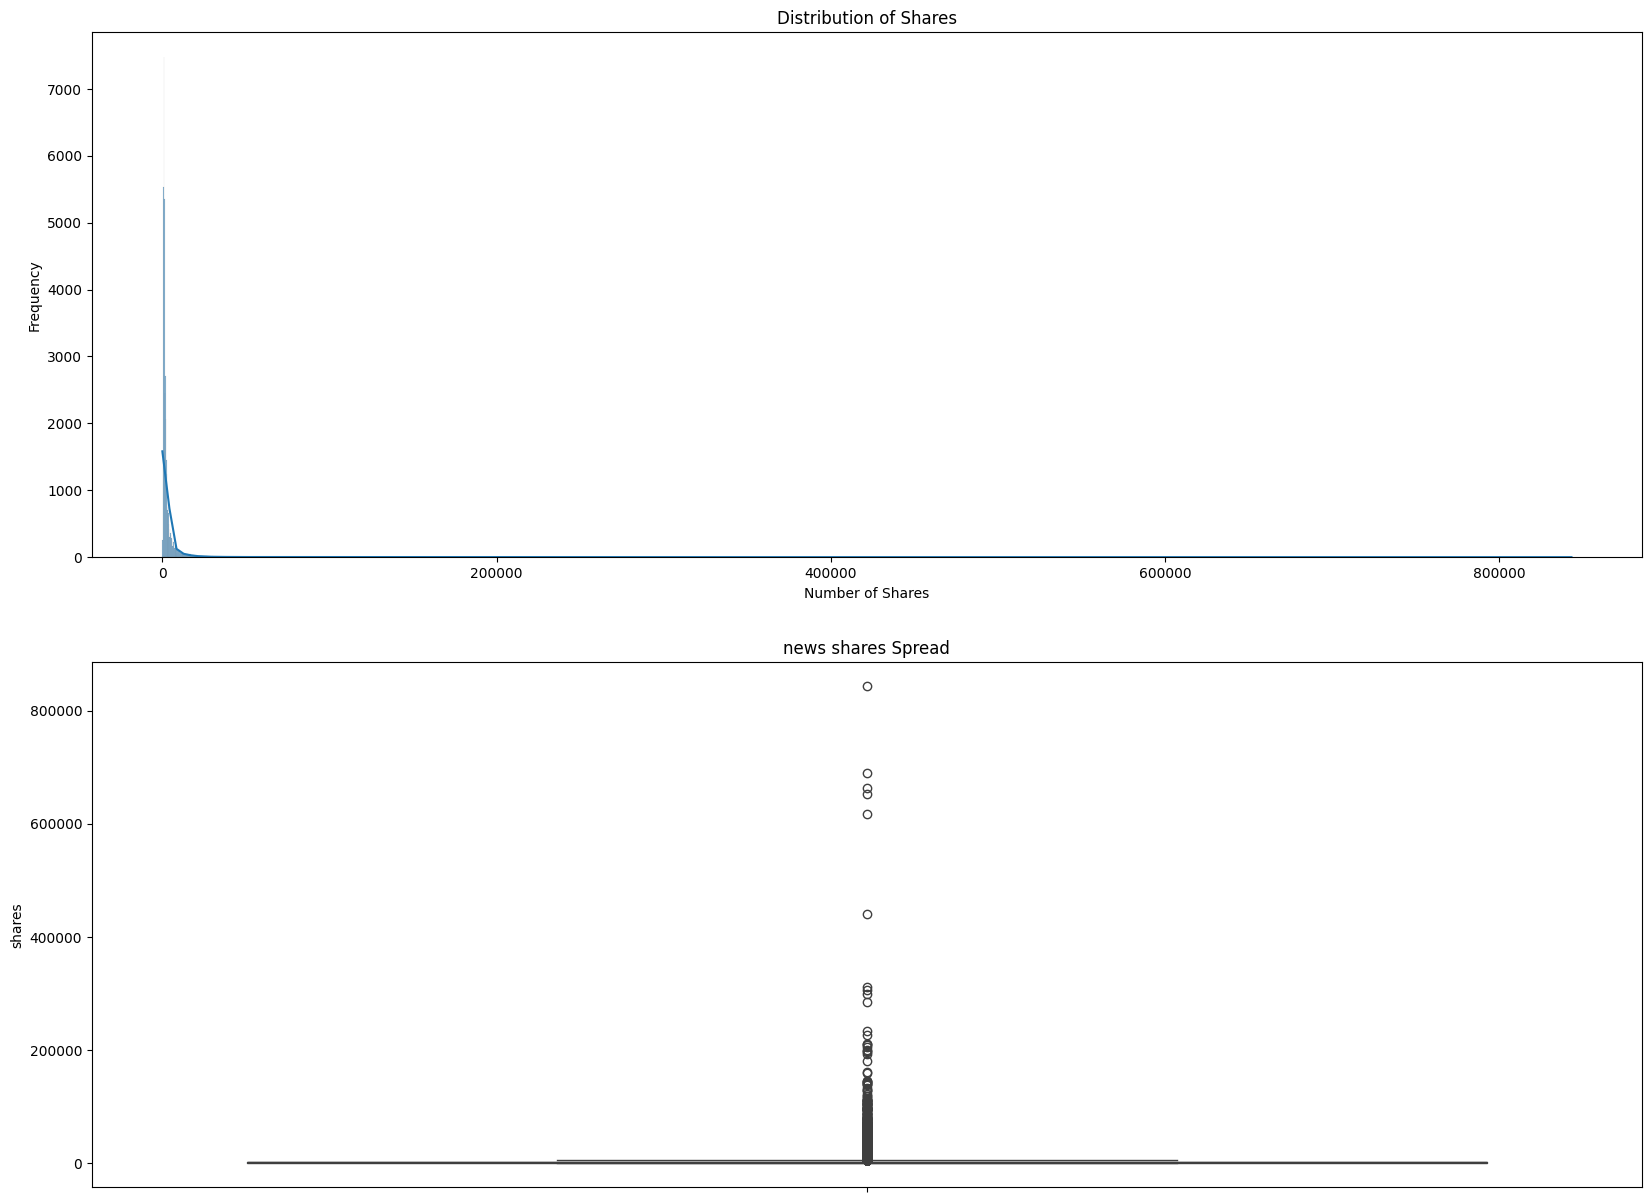

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.histplot(pop_df.shares, bins=3000, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.title('news shares Spread')
sns.boxplot(y=pop_df.shares)

plt.show()

In [ ]:
# Define the 95th percentile threshold for "shares"
cap_value = np.percentile(pop_df.shares, 95)

pop_df['shares_capped'] = np.where(pop_df.shares > cap_value, cap_value, pop_df.shares)

pop_df_filtered = pop_df[pop_df.shares <= cap_value]

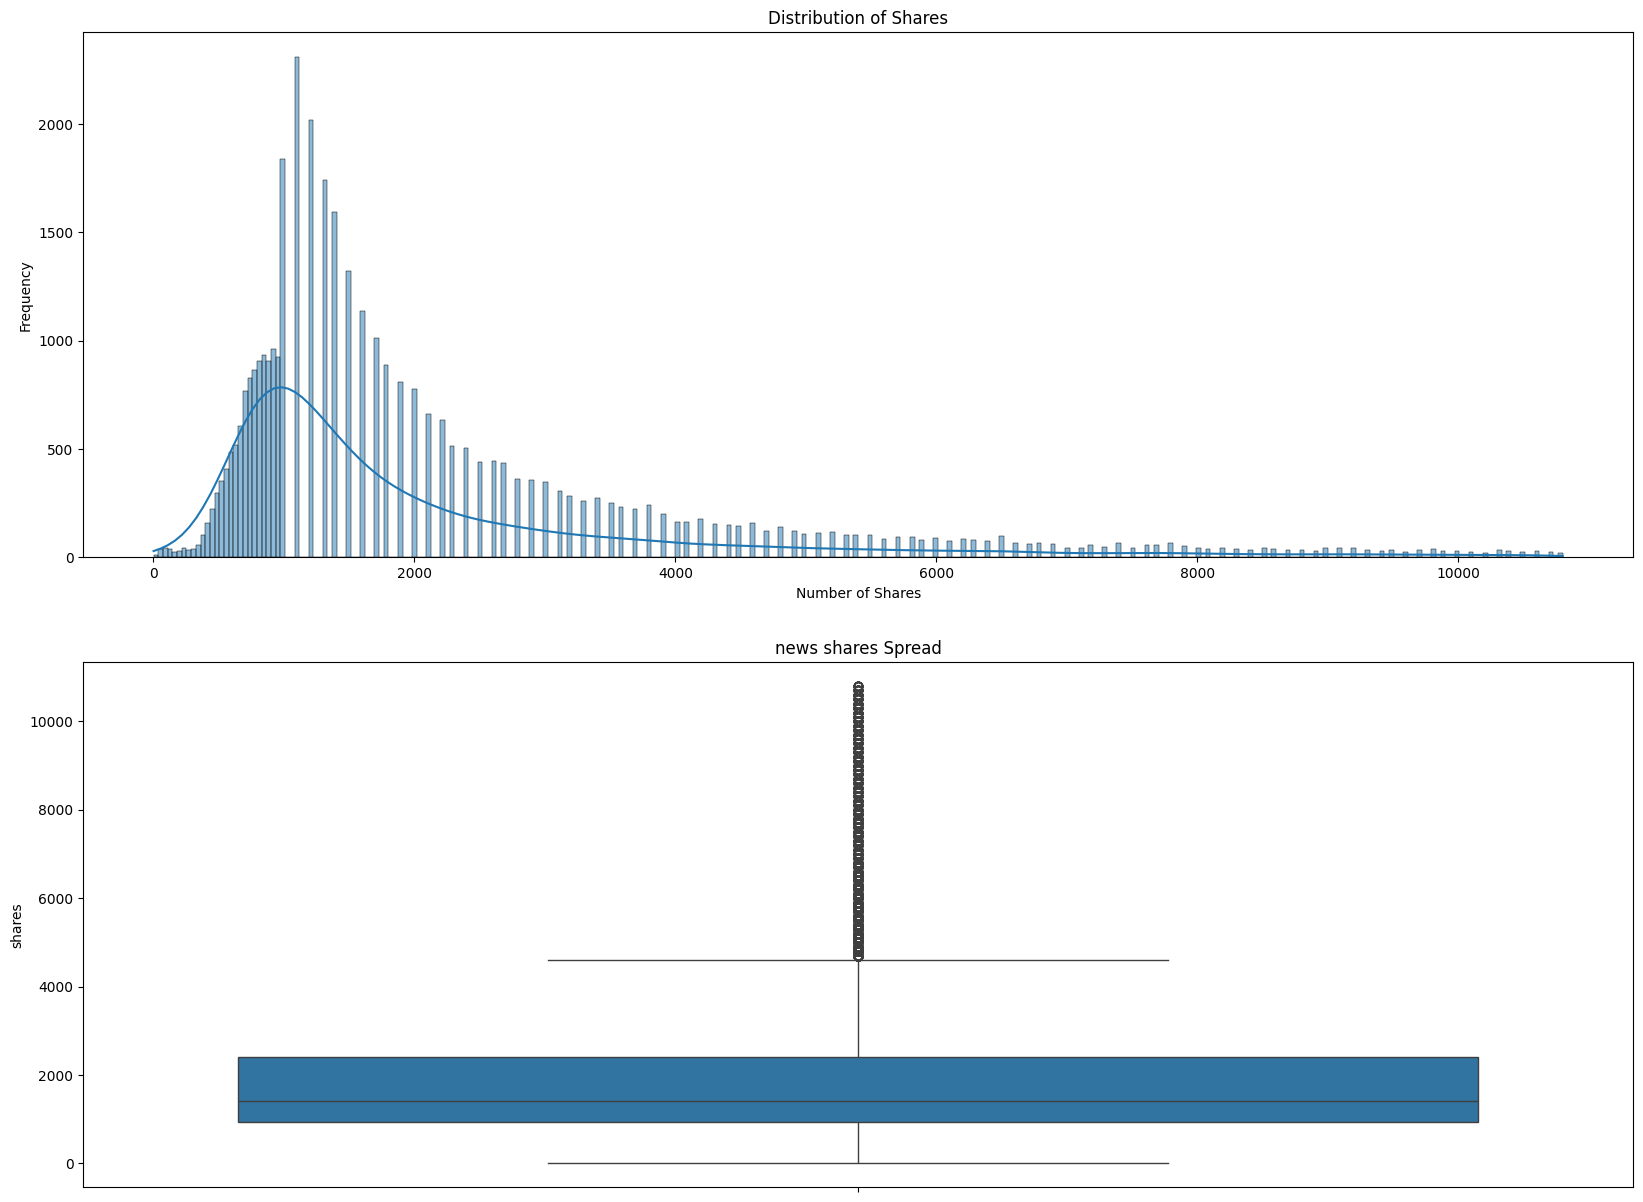

In [ ]:
# Plot the filtered shares
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.histplot(pop_df_filtered.shares , bins=300, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.title('news shares Spread')
sns.boxplot(y=pop_df_filtered.shares )

plt.show()

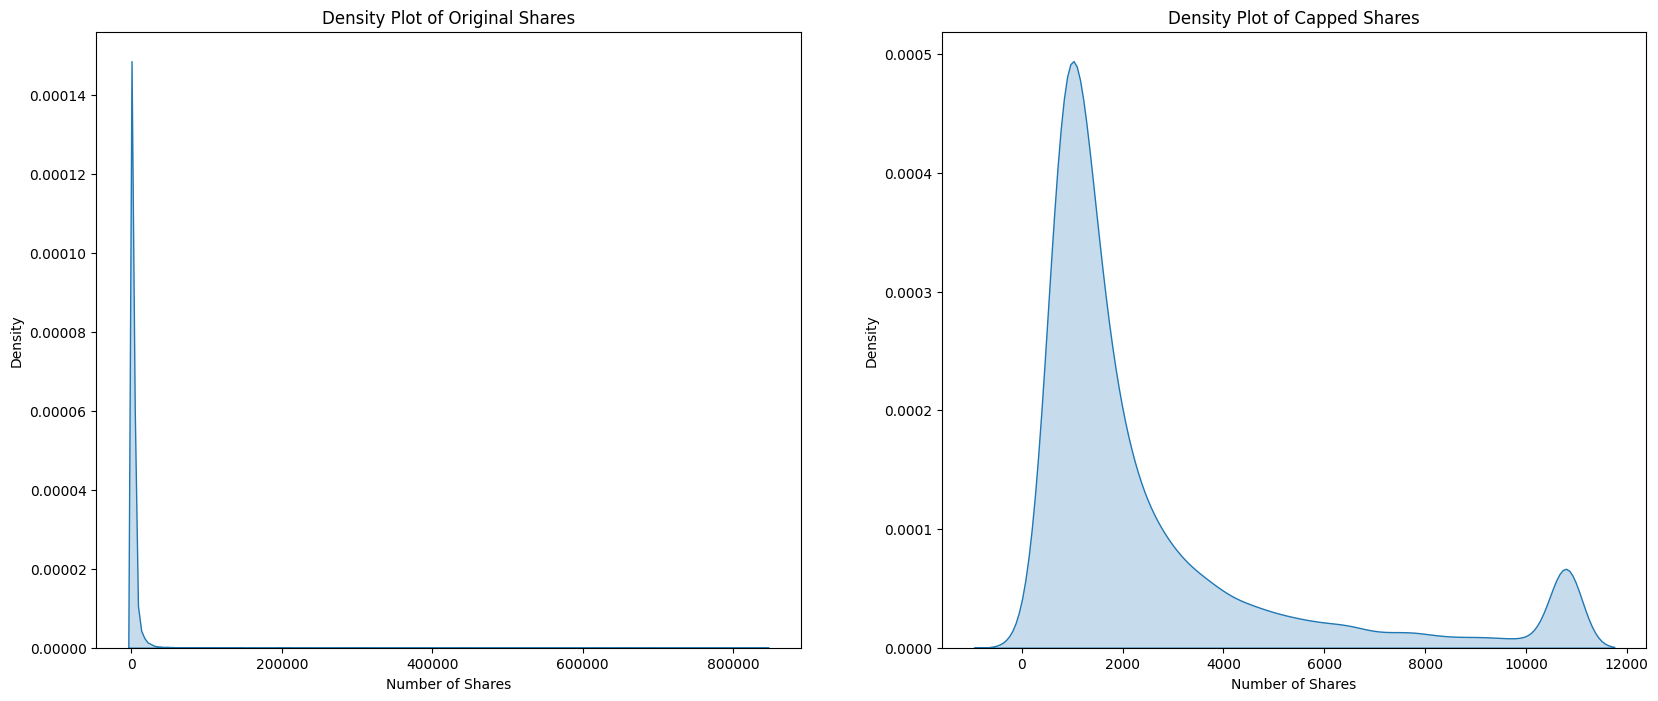

In [ ]:
# Plot density of capped values of shares
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.kdeplot(pop_df.shares, shade=True)
plt.title('Density Plot of Original Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(pop_df.shares_capped, shade=True)
plt.title('Density Plot of Capped Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Density')
plt.show()

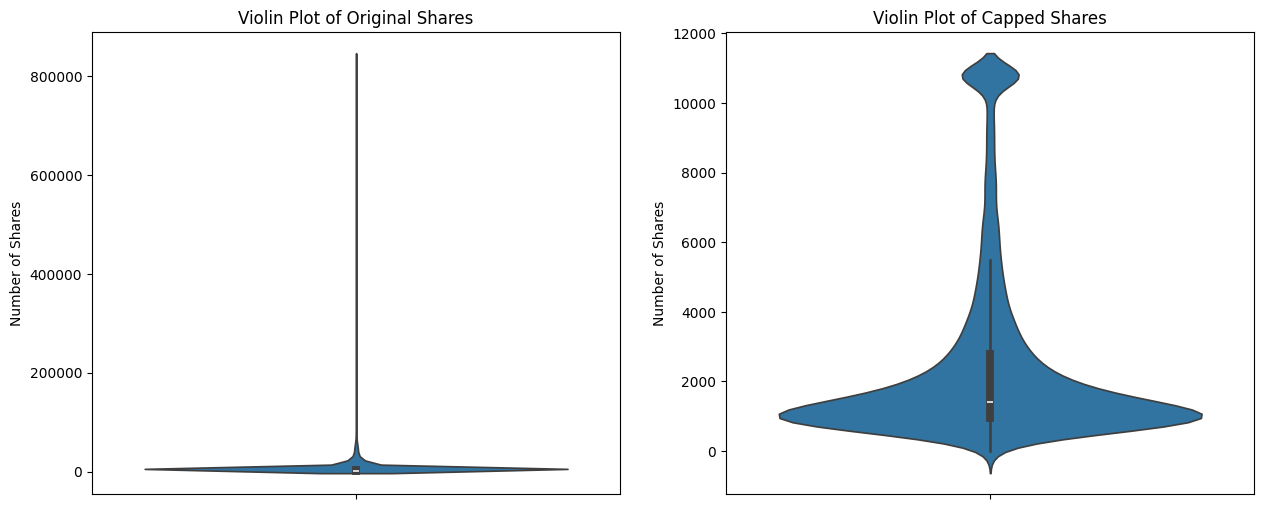

In [ ]:
 #Plot violin
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=pop_df.shares)
plt.title('Violin Plot of Original Shares')
plt.ylabel('Number of Shares')

plt.subplot(1, 2, 2)
sns.violinplot(y=pop_df.shares_capped)
plt.title('Violin Plot of Capped Shares')
plt.ylabel('Number of Shares')

plt.show()

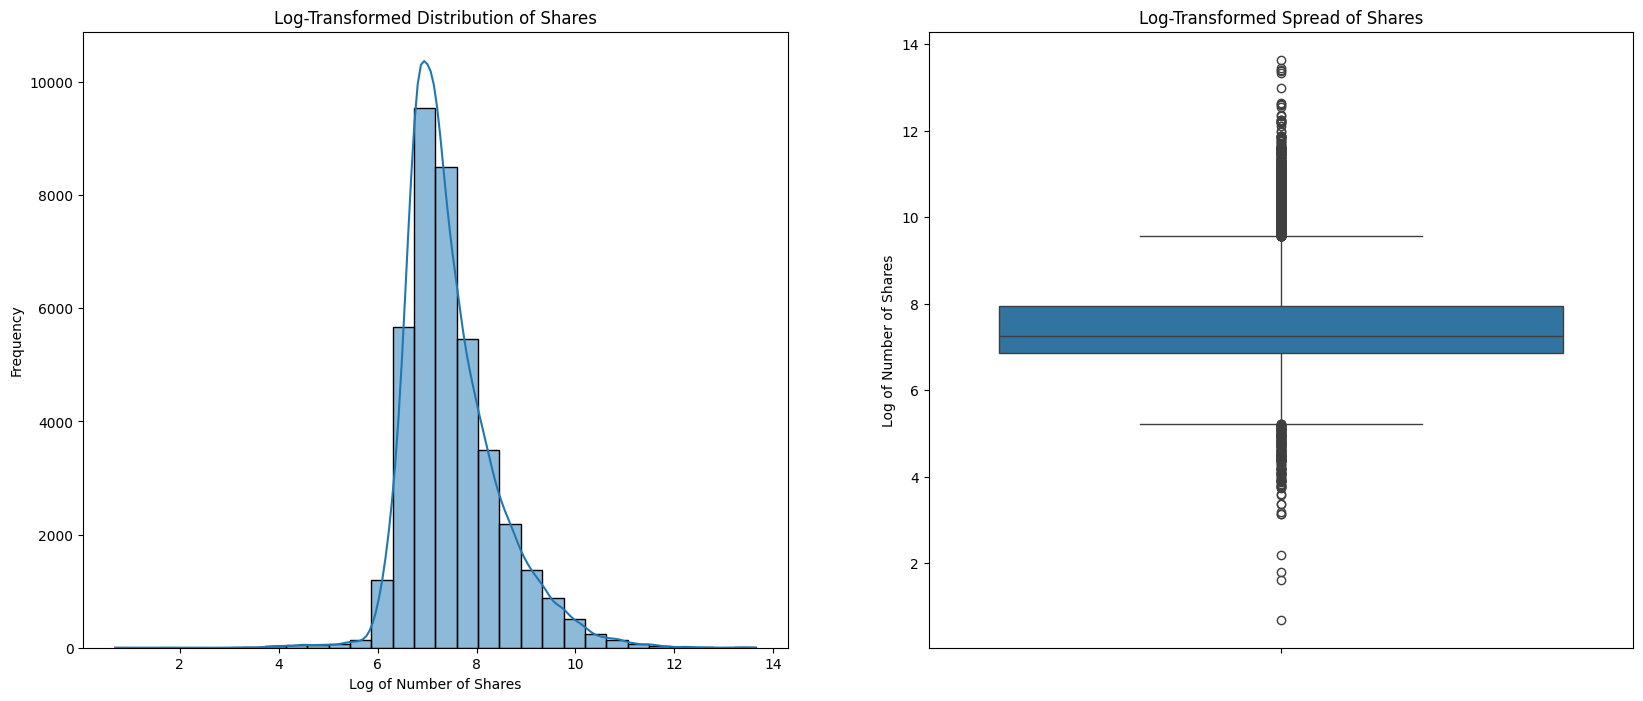

In [ ]:
# Use Log-transformed plots
pop_df['log_shares'] = np.log1p(pop_df['shares'])
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(pop_df.log_shares, bins=30, kde=True)
plt.title('Log-Transformed Distribution of Shares')
plt.xlabel('Log of Number of Shares')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=pop_df.log_shares)
plt.title('Log-Transformed Spread of Shares')
plt.ylabel('Log of Number of Shares')

plt.show()

In [ ]:
pop_df.shares.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
85%,4400.000000
90%,6200.000000
100%,843300.000000


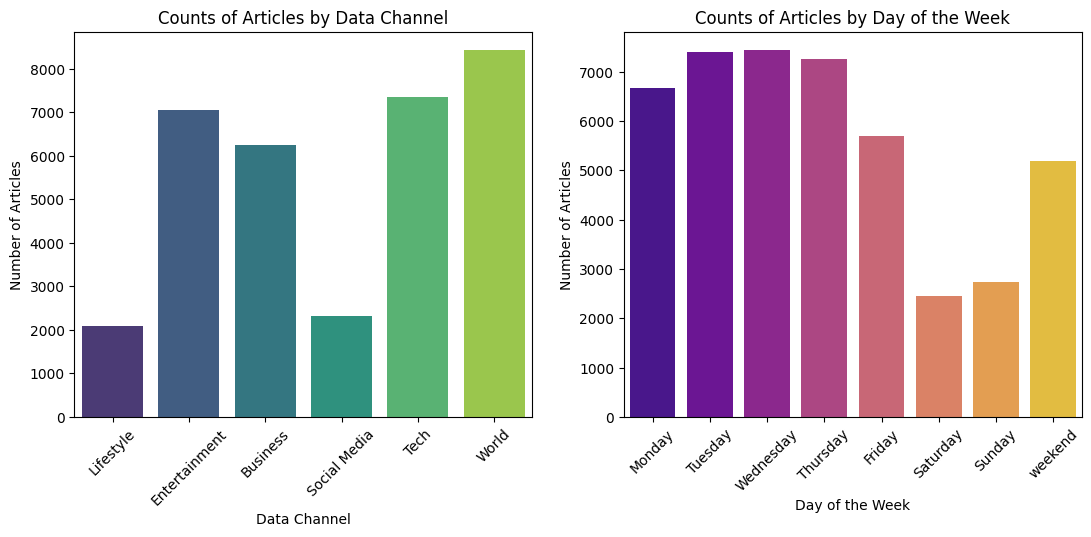

In [ ]:
data_channel_types = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world'
]
data_channel_labels = [
    'Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World'
]

weekdays = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday', 'is_weekend'
]
weekday_labels = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday', 'weekend'
]


plt.figure(figsize=(13, 5))

# Count plot for data channels
plt.subplot(1, 2, 1)
data_channel_counts = pop_df[data_channel_types].sum()
sns.barplot(x=data_channel_labels, y=data_channel_counts.values, palette="viridis")
plt.title('Counts of Articles by Data Channel')
plt.ylabel('Number of Articles')
plt.xlabel('Data Channel')
plt.xticks(rotation=45)

# Count plot for weekdays
plt.subplot(1, 2, 2)
weekday_counts = pop_df[weekdays].sum()
sns.barplot(x=weekday_labels, y=weekday_counts.values, palette="plasma")
plt.title('Counts of Articles by Day of the Week')
plt.ylabel('Number of Articles')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)

plt.show()

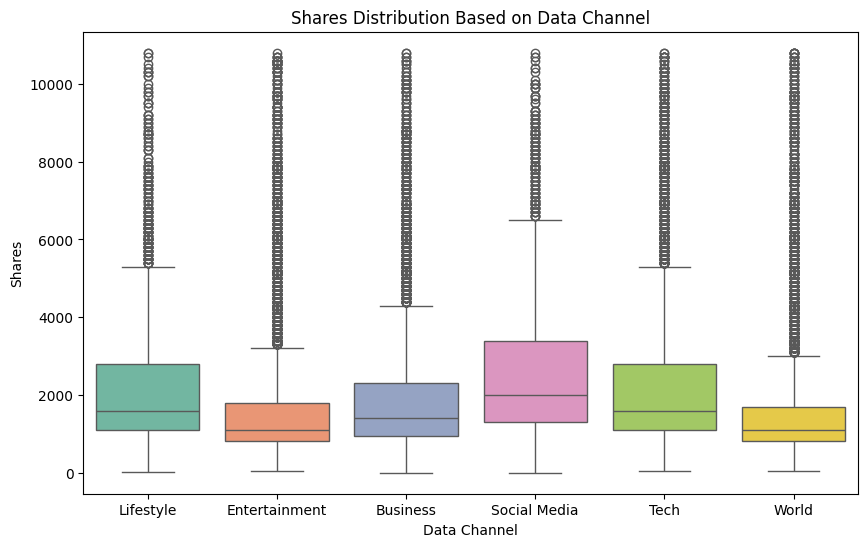

In [ ]:
# melting data frame
melted_pop_df = pd.melt(pop_df_filtered, id_vars=['shares'], value_vars=[
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world'
], var_name='data_channel', value_name='channel_active')

melted_pop_df = melted_pop_df[melted_pop_df['channel_active'] == 1]

# Map the column names to more readable labels
channel_mapping = {
    'data_channel_is_lifestyle': 'Lifestyle',
    'data_channel_is_entertainment': 'Entertainment',
    'data_channel_is_bus': 'Business',
    'data_channel_is_socmed': 'Social Media',
    'data_channel_is_tech': 'Tech',
    'data_channel_is_world': 'World'
}
melted_pop_df['data_channel'] = melted_pop_df['data_channel'].map(channel_mapping)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='data_channel', y='shares', data=melted_pop_df, palette='Set2')
plt.title('Shares Distribution Based on Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Shares')

plt.show()

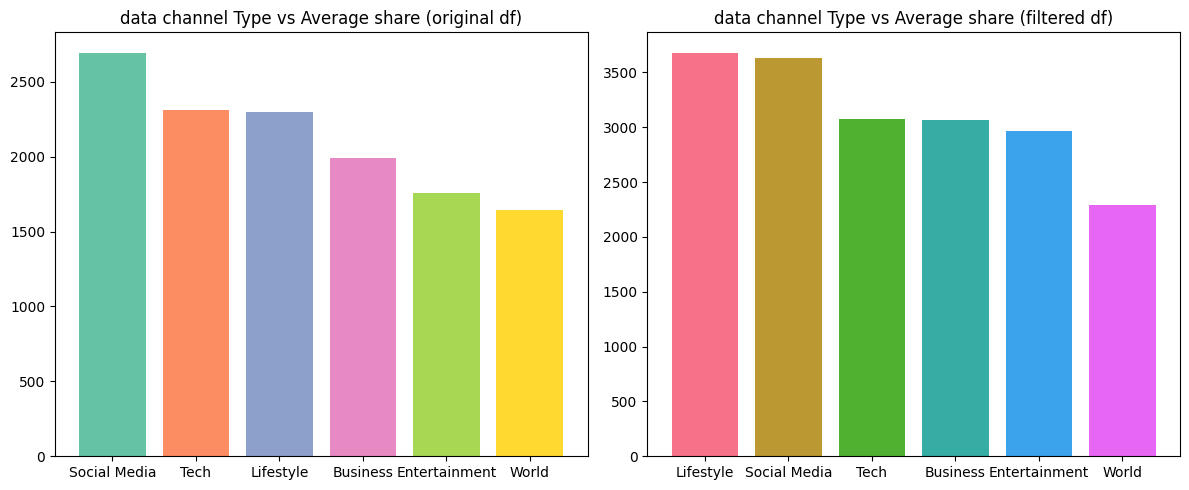

In [ ]:
# Compair original vs filtered in average of shares

#original
# melting data frame
melted_original_pop_df = pd.melt(pop_df, id_vars=['shares'], value_vars=[
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world'
], var_name='data_channel', value_name='channel_active')

melted_original_pop_df = melted_original_pop_df[melted_original_pop_df['channel_active'] == 1]

# Map the column names to more readable labels
channel_mapping = {
    'data_channel_is_lifestyle': 'Lifestyle',
    'data_channel_is_entertainment': 'Entertainment',
    'data_channel_is_bus': 'Business',
    'data_channel_is_socmed': 'Social Media',
    'data_channel_is_tech': 'Tech',
    'data_channel_is_world': 'World'
}
melted_original_pop_df['data_channel'] = melted_original_pop_df['data_channel'].map(channel_mapping)

original_df = pd.DataFrame(melted_original_pop_df.groupby(['data_channel']).shares.mean().sort_values(ascending = False))
# Filtered:
filtered_df = pd.DataFrame(melted_pop_df.groupby(['data_channel']).shares.mean().sort_values(ascending = False))

# Plottin
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(filtered_df.index, filtered_df.shares, color=sns.color_palette("Set2"))
plt.title('data channel Type vs Average share (original df)')

plt.subplot(1, 2, 2)
plt.bar(original_df.index, original_df.shares, color=sns.color_palette("husl"))
plt.title('data channel Type vs Average share (filtered df)')

plt.tight_layout()
plt.show()

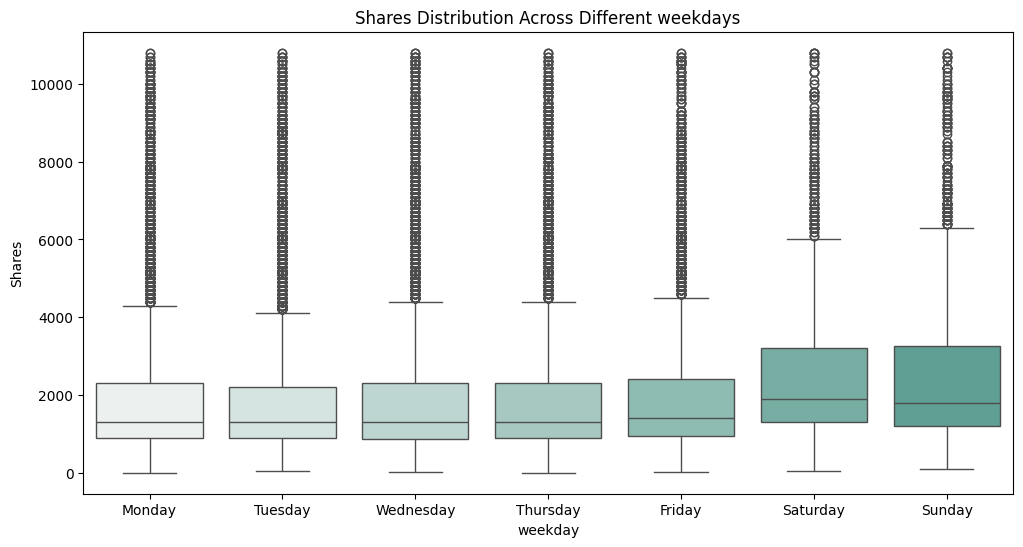

In [ ]:
# Visualising days of week
# Create a new column 'weekday' with NaN initially
pop_df_filtered['weekday'] = np.nan

# Whether or not
conditions = [
    pop_df_filtered['weekday_is_monday'] == 1,
    pop_df_filtered['weekday_is_tuesday'] == 1,
    pop_df_filtered['weekday_is_wednesday'] == 1,
    pop_df_filtered['weekday_is_thursday'] == 1,
    pop_df_filtered['weekday_is_friday'] == 1,
    pop_df_filtered['weekday_is_saturday'] == 1,
    pop_df_filtered['weekday_is_sunday'] == 1

]
# Corresponding category names
weekday_name = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
]

# Use np.select to assign the weekday values based on conditions
pop_df_filtered['weekday'] = np.select(conditions, weekday_name, default=np.nan)

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='shares', data=pop_df_filtered, palette='light:#5A9')
plt.title('Shares Distribution Across Different weekdays')
plt.xlabel('weekday')
plt.ylabel('Shares')

plt.show()

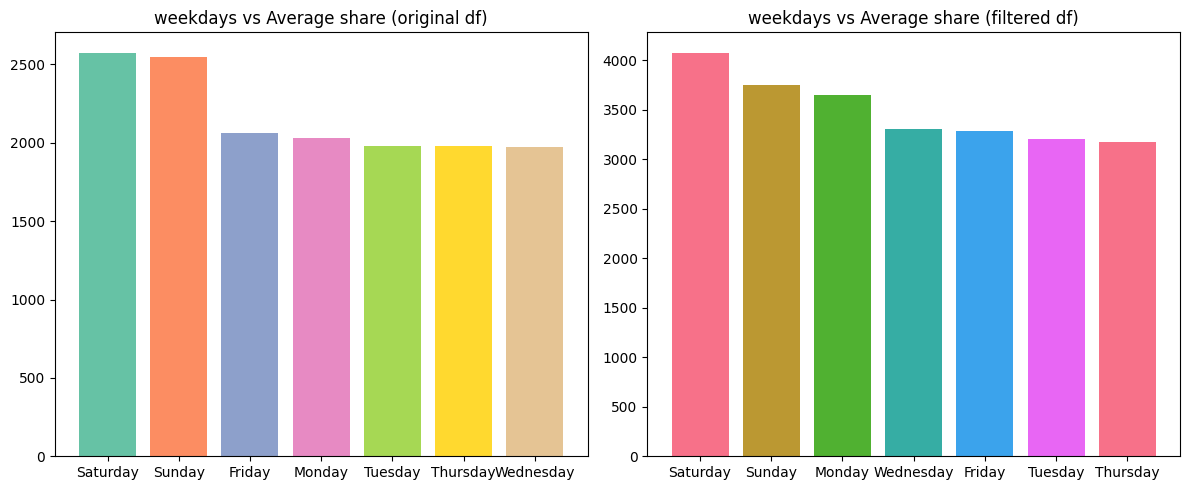

In [ ]:
# Compair original vs filtered in average of shares

# Original:
# Create a new column 'weekday' with NaN initially
pop_df['weekday'] = np.nan

# Whether or not
conditions = [
    pop_df['weekday_is_monday'] == 1,
    pop_df['weekday_is_tuesday'] == 1,
    pop_df['weekday_is_wednesday'] == 1,
    pop_df['weekday_is_thursday'] == 1,
    pop_df['weekday_is_friday'] == 1,
    pop_df['weekday_is_saturday'] == 1,
    pop_df['weekday_is_sunday'] == 1

]

# Corresponding category names
weekday_name = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
]

# Use np.select to assign the weekday values based on conditions
pop_df['weekday'] = np.select(conditions, weekday_name, default=np.nan)

original_df = pd.DataFrame(pop_df.groupby(['weekday']).shares.mean().sort_values(ascending = False))

# Filtered:
filtered_df = pd.DataFrame(pop_df_filtered.groupby(['weekday']).shares.mean().sort_values(ascending = False))

# Plottin
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(filtered_df.index, filtered_df.shares, color=sns.color_palette("Set2"))
plt.title('weekdays vs Average share (original df)')

plt.subplot(1, 2, 2)
plt.bar(original_df.index, original_df.shares, color=sns.color_palette("husl"))
plt.title('weekdays vs Average share (filtered df)')

plt.tight_layout()
plt.show()

In [ ]:
# Removing unnecessary feature we made
pop_df.drop(['weekday'],axis="columns",inplace=True)
pop_df_filtered.drop(['weekday'],axis="columns",inplace=True)

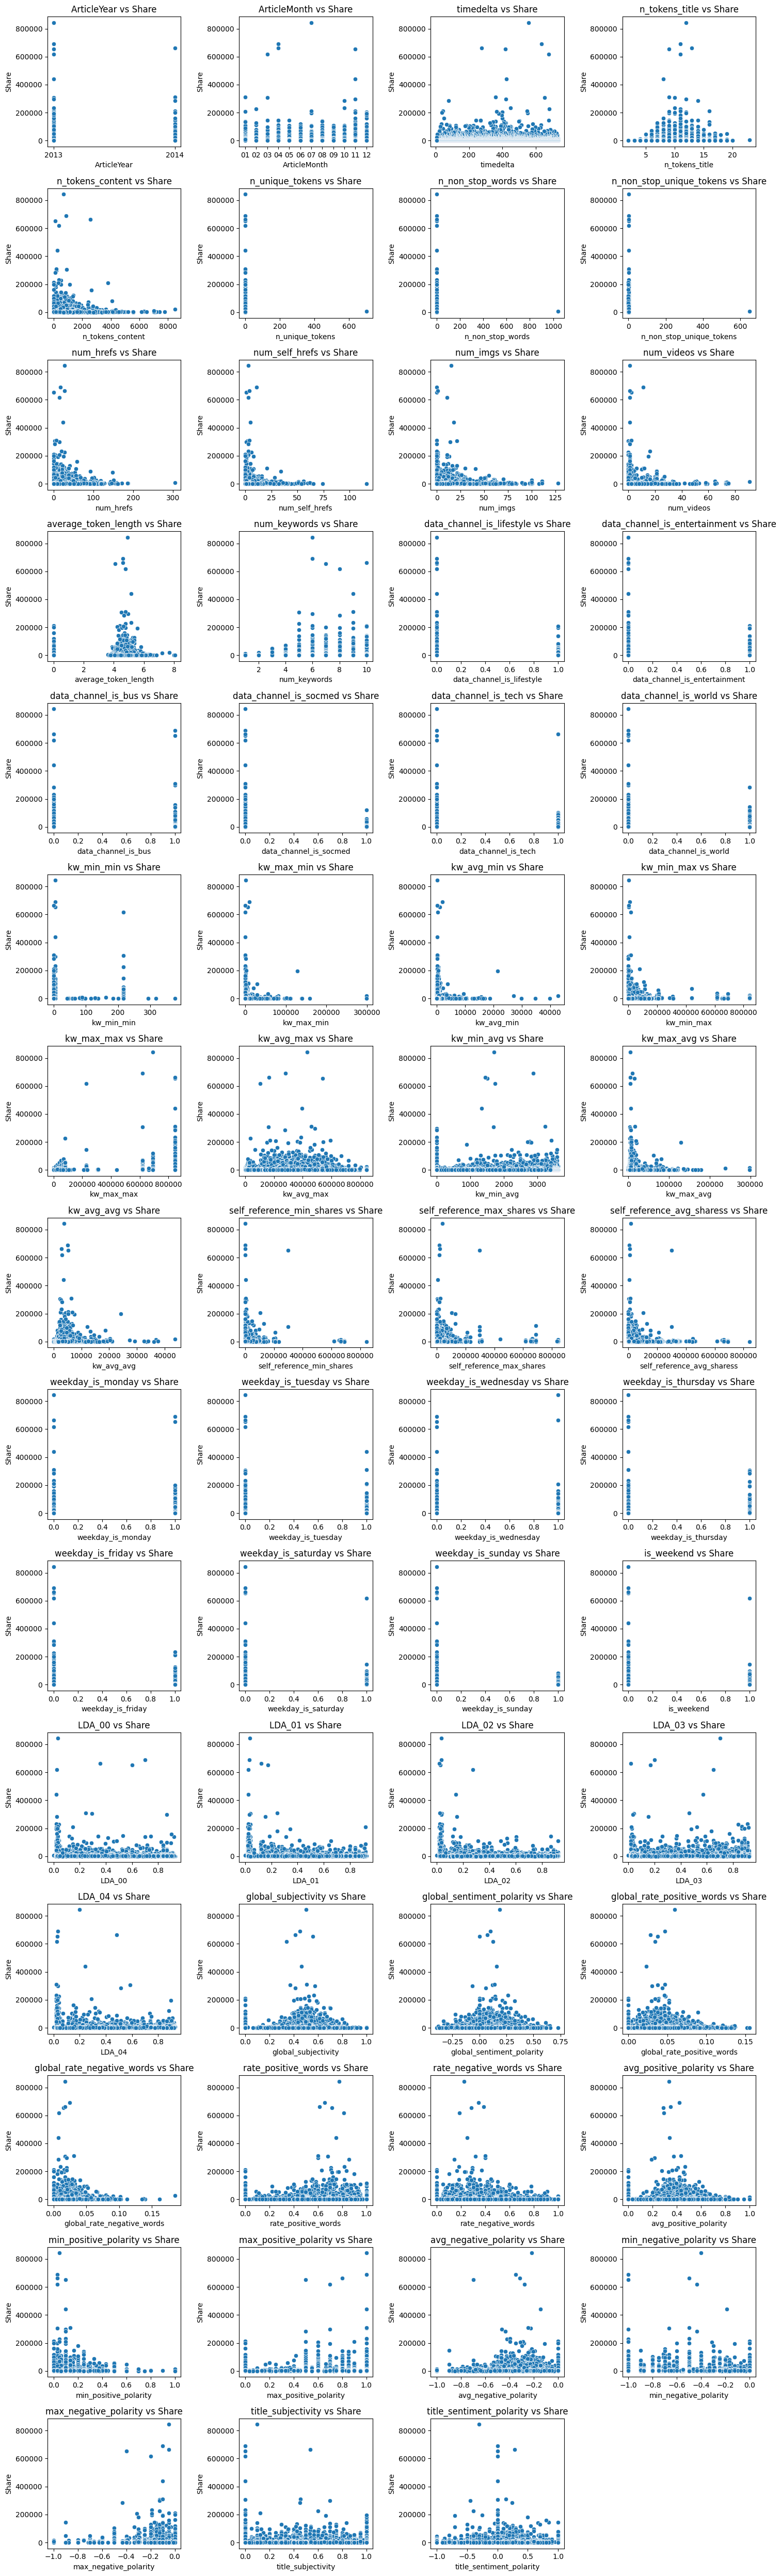

In [ ]:
def scatter(x,fig):
    plt.subplot(15,4,fig)
    sns.scatterplot(x=pop_df[x],y=pop_df['shares'])
    plt.title(f"{x} vs Share")
    plt.ylabel('Share')
    plt.xlabel(x)

plt.figure(figsize=(15,50))

for i in range(59):
    scatter(pop_df.columns[i], i+1)

plt.tight_layout()
plt.show()

In [ ]:
lr_df = pop_df_filtered[['shares','is_weekend','data_channel_is_tech','LDA_04','data_channel_is_socmed','weekday_is_saturday',
                         'weekday_is_sunday','num_hrefs','global_sentiment_polarity','LDA_00','kw_min_avg','data_channel_is_world',
                         'LDA_02','LDA_01','data_channel_is_entertainment','rate_negative_words','ArticleMonth']]

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(lr_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['shares','LDA_04','num_hrefs','global_sentiment_polarity','LDA_00','kw_min_avg',
             'LDA_02','LDA_01','rate_negative_words','ArticleMonth']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

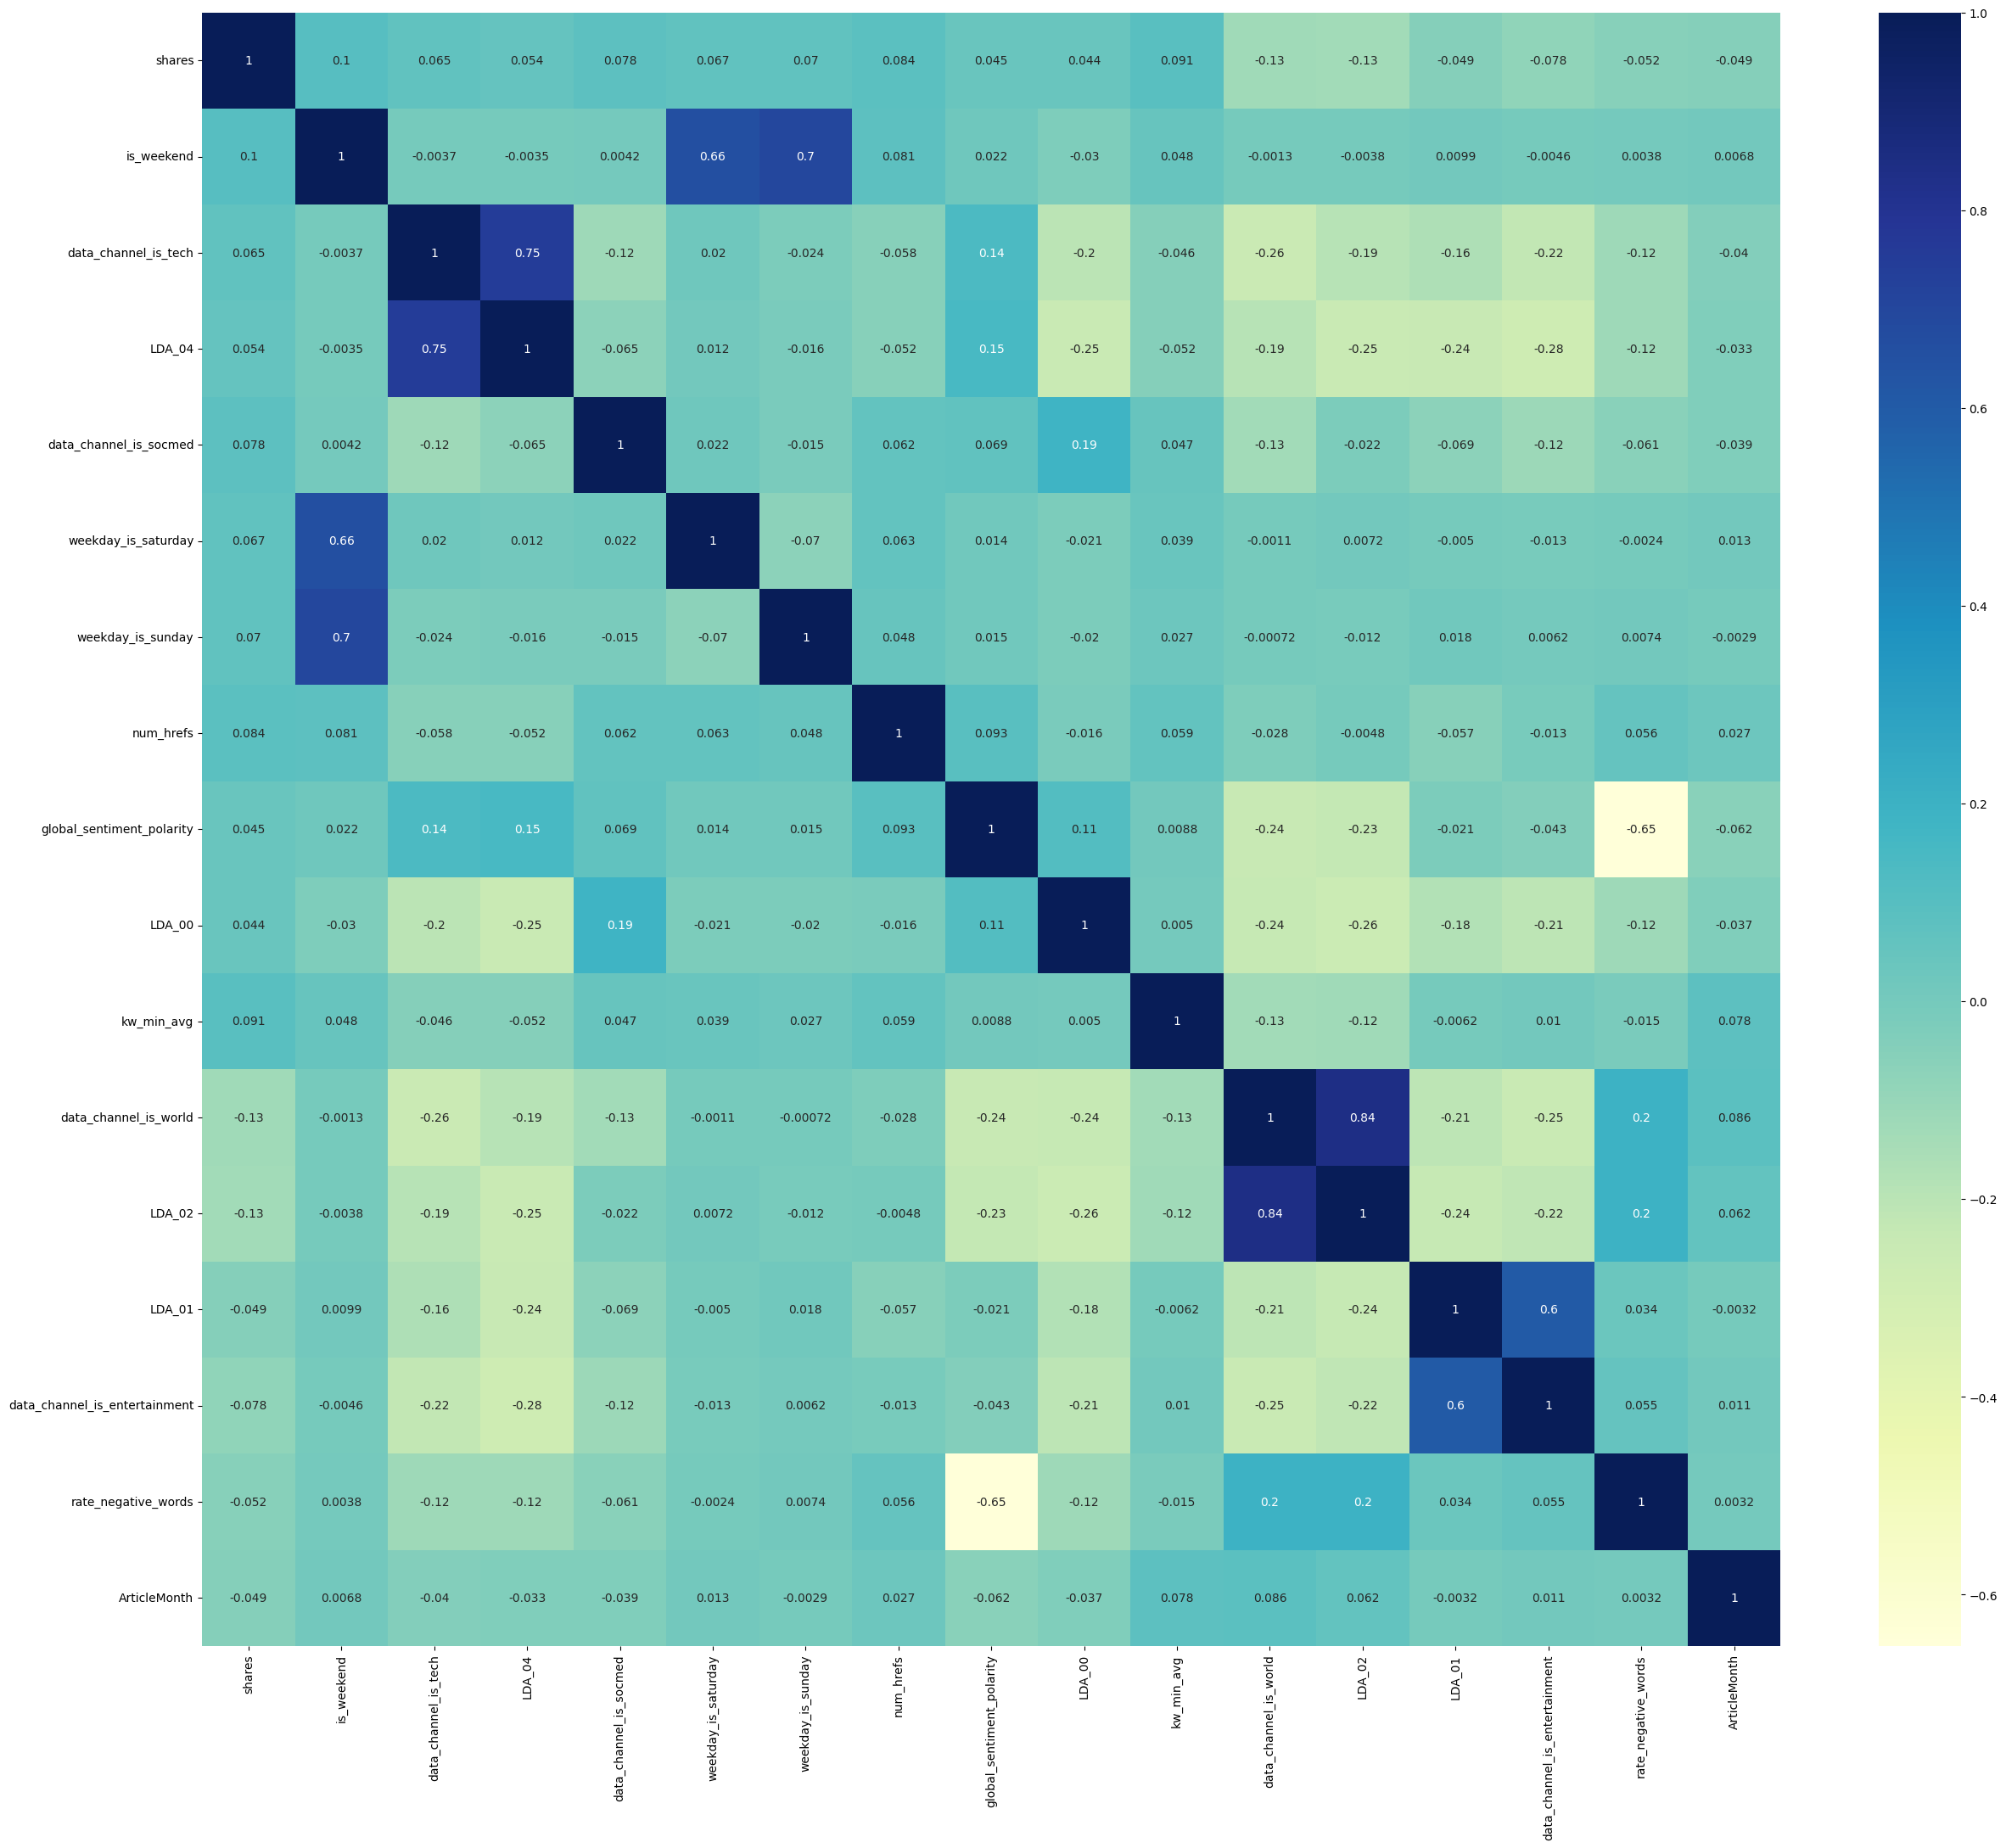

In [ ]:
df_train.head()# Heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

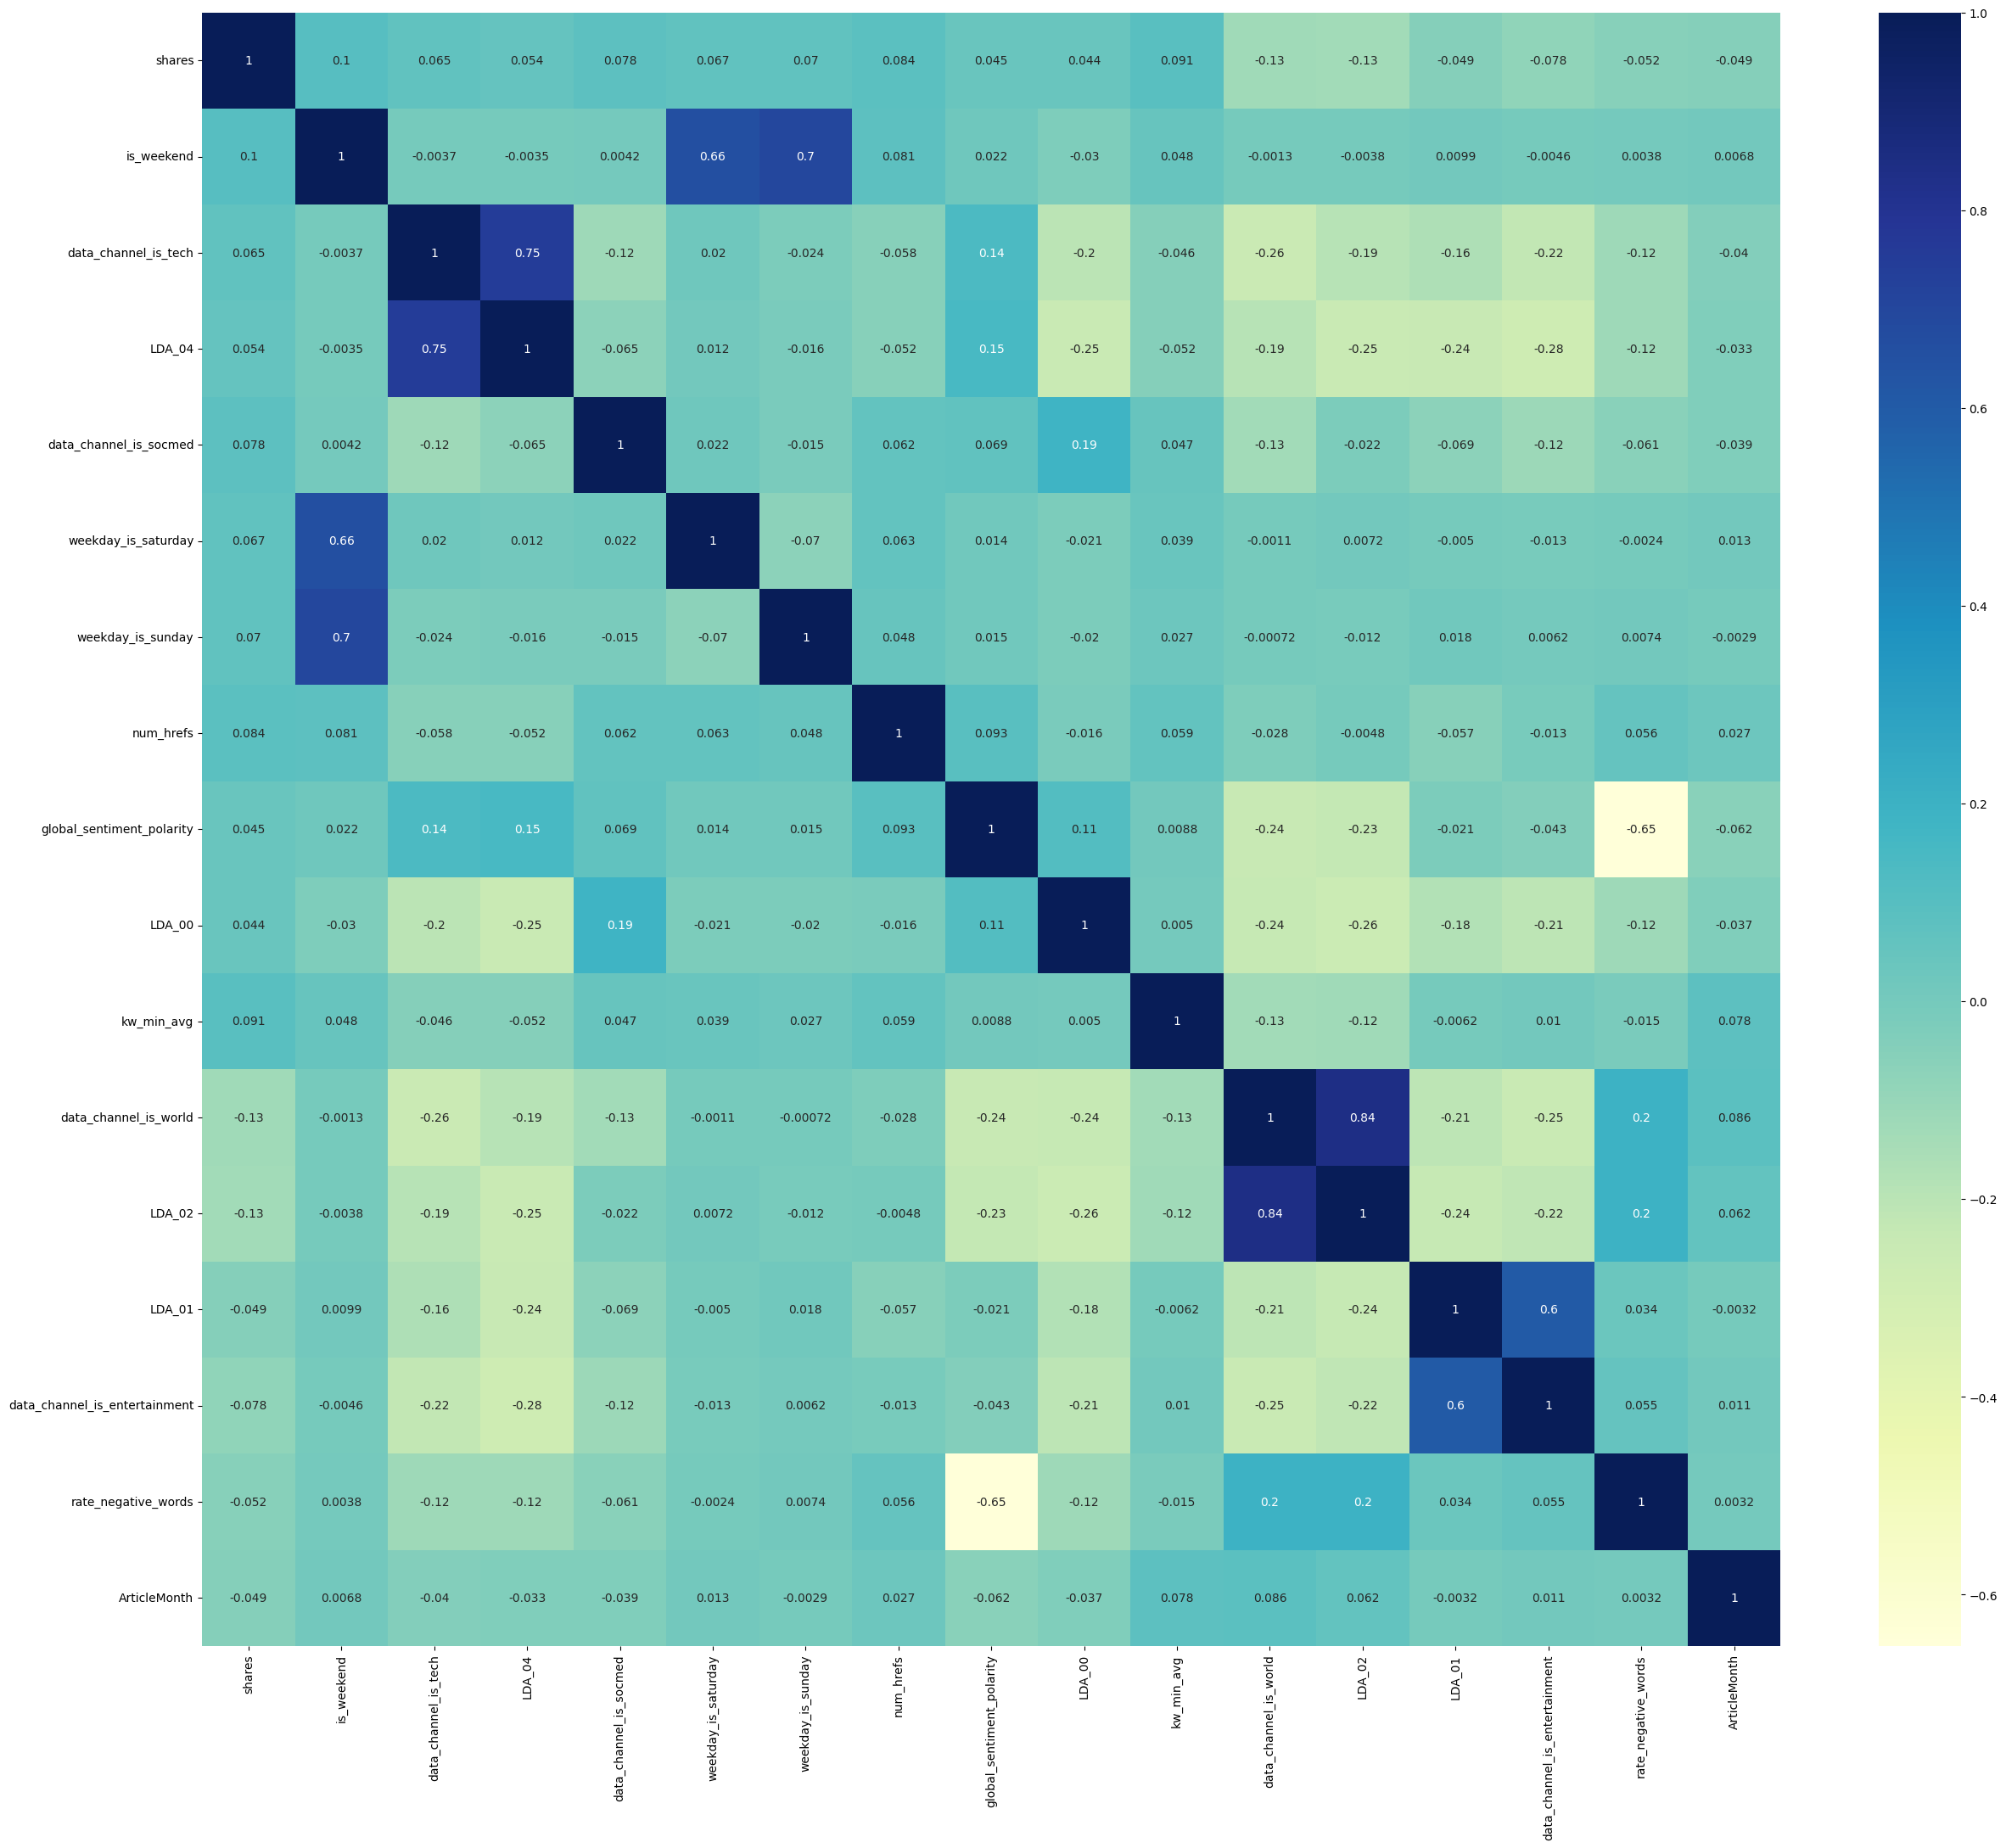

In [ ]:
# Heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
num_vars = ['shares','LDA_04','num_hrefs','global_sentiment_polarity','LDA_00','kw_min_avg',
             'LDA_02','LDA_01','rate_negative_words','ArticleMonth']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('shares')
X_test = df_test

In [ ]:
import statsmodels.formula.api as sm

# Assuming you want to use all features in df_train for prediction:
formula = 'shares ~ ' + ' + '.join(df_train.columns.drop('shares'))
lm = sm.ols(formula=formula, data=df_train).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:27:43   Log-Likelihood:                 9803.0
No. Observations:               26364   AIC:                        -1.957e+04
Df Residuals:                   26348   BIC:                        -1.944e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     